#             BREAST CANCER DETECTION USING MACHINE LEARNING
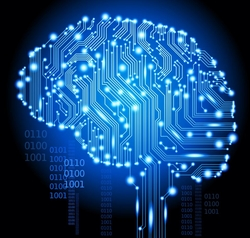

## INTRODUCTION:
Breast Cancer is one of the most common cancers in women worldwide, representing a majority of cancer-related deaths according to global statistics. The early detection of breast cancer can help in timely treatment and promote the chances of survival significantly. 

In this project, I have used machine learning to classify whether the breast cancer is benign(non-cancerous) or malignant(cancerous).

In [1]:
%matplotlib inline

In [2]:
# Set a random seed
import random
random.seed(42)

## DATA PREPARATION AND EXPLORATION

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print("Dataset dimensions: ", dataset.shape)

Dataset dimensions:  (569, 33)


In [6]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Find out the missing or NaN data points
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Target variable is diagnosis
y = dataset['diagnosis']
print(y[:30])

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
25    M
26    M
27    M
28    M
29    M
Name: diagnosis, dtype: object


<AxesSubplot:>

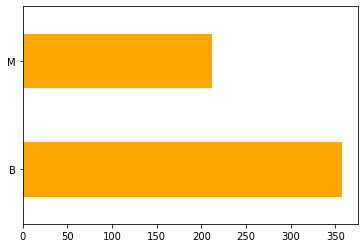

In [9]:
# Visualising the values stored in y
pd.value_counts(y).plot(kind='barh', color='orange')

In [10]:
# Dropping the target variable 'diagnosis', dropping 'id' because it is not needed, 
# and 'Unnamed: 32' because all values present in it are null.
X = dataset.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)    # Axis = 1 for columns, Axis=0 for rows
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>],
       [<AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave

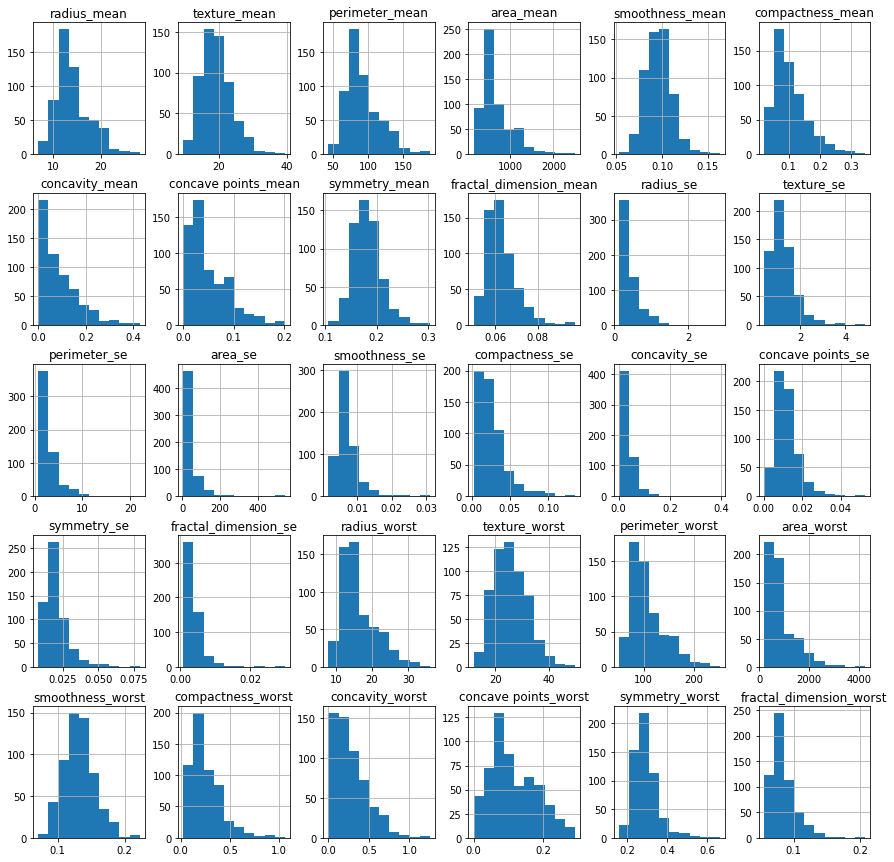

In [12]:
# Visualising the values stored in each column of X
X.hist(layout=(5,6), figsize=(15,15))

## CATEGORICAL DATA 

In [13]:
# Since only y contains categorical data here, we replace 'B' with 0 and 'M' with 1
y_encoded = y.apply(lambda x: '0' if x=='B' else '1')
print(y_encoded[:30])

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: diagnosis, dtype: object


## SPLITTING THE DATASET

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

## FEATURE SCALING

In [15]:
# Since the values in the columns of X are highly varying, we scale them
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## TRAINING, TESTING AND SCORING

In [16]:
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Defining the classifier and fitting it to the data
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
# Predicting values for test set
y_pred_test = DT.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[97 11]
 [ 4 59]]


In [21]:
# Calculating the accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of test set: ", accuracy_test)

Accuracy of test set:  0.9122807017543859


### The accuracy of Decision Tree Classifier is 91.22%. This can be improved by analysing if overfitting or underfitting has occured.

## IMPROVING THE DECISION TREE CLASSIFICATION MODEL

In [22]:
# Predicting values for train set
y_pred_train = DT.predict(X_train)
# Calculating accuracy for train set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy of train set: ", accuracy_train)

Accuracy of train set:  1.0


### The accuracy for train set is 100%. Hence, the model is overfitted.

In [23]:
# Initialising the improved model by specifying the hyperparameters and fitting it to data
DT_improved = DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10, random_state=0)
DT_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=10,
                       random_state=0)

In [24]:
# Predicting using the improved model
y_pred_new = DT_improved.predict(X_test)

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[102   6]
 [  2  61]]


In [26]:
# Calculating the accuracy of the improved model
accuracy_test = accuracy_score(y_test, y_pred_new)
print("Accuracy of test set: ", accuracy_test)

Accuracy of test set:  0.9532163742690059


## Thus, we have achieved an accuracy of <u>95.32%</u> by using an improved Decision Tree Classifier.

### For further improvements, we can use comparative analysis by testing on other classification algorithms such as KNN, SVM, Random Forest, and Naive Bayes

## VISUALISING THE DECISION TREE

In [27]:
# Importing the libraries
import graphviz
from sklearn import tree

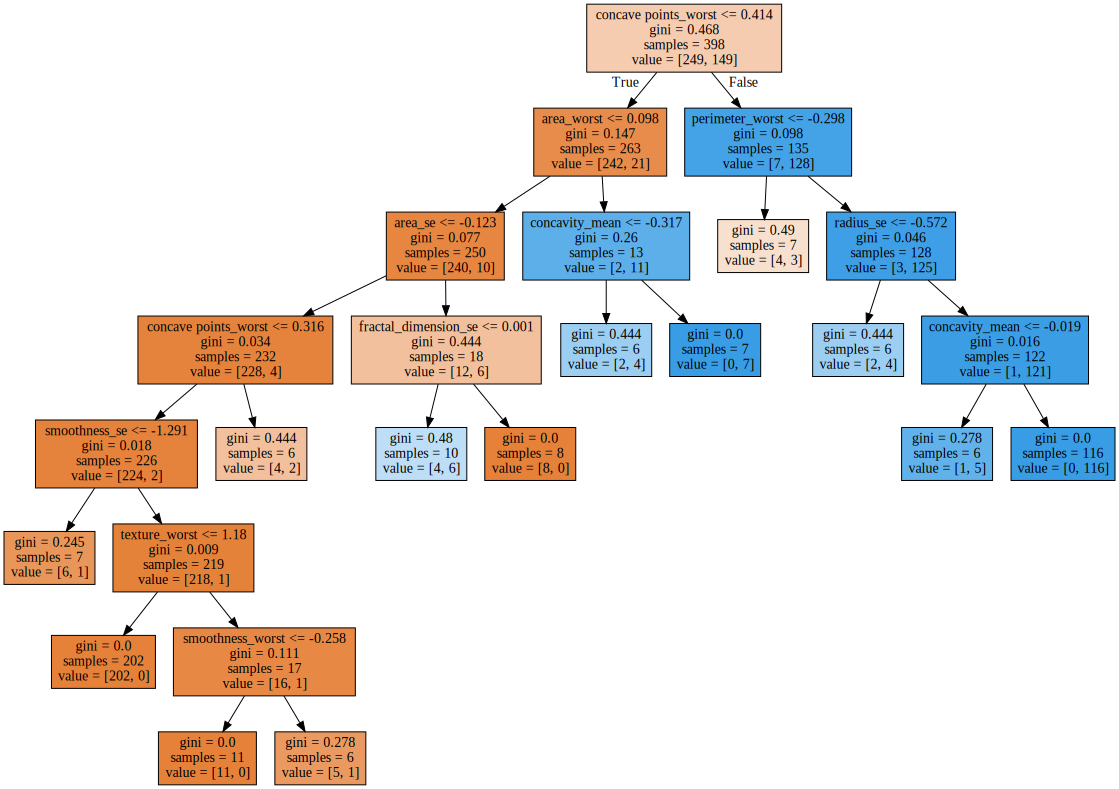

In [28]:
# DOT data
dot_data = tree.export_graphviz(DT_improved, feature_names=X.columns, out_file=None, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph